In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

# Reading the dataset
dataset = pd.read_csv("wdbc.data", sep=",").values

#Forming a data frame 
all_attributes = ["ID","Diagnosis","mean_radius","mean_texture","mean_perimeter","mean_area","mean_smoothness","mean_compactness","mean_concavity","mean_concave_points","mean_symmetry","mean_fractal_dimension","se_radius","se_texture","se_perimeter","se_area","se_smoothness","se_compactness","se_concavity","se_concave_points","se_symmetry","se_fractal_dimension",
            "worst_radius","worst_texture","worst_perimeter","worst_area","worst_smoothness","worst_compactness","worst_concavity","worst_concave_points","worst_symmetry","worst_fractal_dimension"]

attributes = ["worst_radius","worst_texture","worst_perimeter","worst_area","worst_smoothness","worst_compactness","worst_concavity","worst_concave_points","worst_symmetry","worst_fractal_dimension"]
data = pd.DataFrame(data=dataset,columns=all_attributes)
data.set_index("ID", inplace=True)

# Displaying the diagnosis(M = malignant, B = benign) and the 30 real-valued attributes
display(data.head())

,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
ID,,,,,,,,,,,,,,,,,,,,,
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678
843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244


In [2]:
# Label-1 indicates malignant and Label-0 indicates benign 
data["Diagnosis"] = data["Diagnosis"].replace("M",1)
data["Diagnosis"] = data["Diagnosis"].replace("B",0)
data = data.apply(pd.to_numeric, errors="ignore")

# Extracting the columns representing the maximum values of the features
X = dataset[:,22:32]
X = X.astype("float64")
min_val = np.min(X,axis=0)
max_val = np.max(X,axis=0)
X = np.divide((X-min_val),(max_val-min_val))
labels = data["Diagnosis"].values.reshape(-1,1)
data.drop("Diagnosis", axis = 1, inplace = True)
final_data = np.concatenate([X,labels],axis=1)
m,n = X.shape

In [3]:
# The random seed is varied to take the values 0,5,10,15,20 to perform 5-fold cross validation.
# The feature combination with the highest accuracy is then selected
np.random.seed(0)

# Selecting 2 features

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

for k in range(5):
    max_f1 = 0
    for i in range(n):
        for j in range(i+1,n):
            x = np.concatenate((X[:,i].reshape(-1,1),X[:,j].reshape(-1,1)),axis=1)
            final_data = np.concatenate([x,labels],axis=1)
            np.random.shuffle(final_data)
            x_train = final_data[0:int(0.8*m),0:2]
            y_train = final_data[0:int(0.8*m),2]
            x_test  = final_data[int(0.8*m):,0:2]
            y_test  = final_data[int(0.8*m):,2]
            logisticRegr = LogisticRegression()
            logisticRegr.fit(x_train,y_train)
            predictions = logisticRegr.predict(x_test)
            p = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('precision')
            r = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('recall')
            f1 = (2*r*p)/(r+p)
            if f1>max_f1:
                max_f1 = f1
                index1 = i
                index2 = j
    print("F1 = {}\n".format(max_f1))
    print("Feature Combination:\n{}\n{}\n".format(attributes[index1],attributes[index2]))
    print("Indices\n{} and {}\n".format(index1,index2))
            

F1 = 0.96248766041461

Feature Combination:
worst_perimeter
worst_smoothness

Indices
2 and 4

F1 = 0.9604029176797498

Feature Combination:
worst_area
worst_concave_points

Indices
3 and 7

F1 = 0.9506108656095659

Feature Combination:
worst_radius
worst_symmetry

Indices
0 and 8

F1 = 0.9567198177676537

Feature Combination:
worst_perimeter
worst_fractal_dimension

Indices
2 and 9

F1 = 0.9645852749301025

Feature Combination:
worst_area
worst_concave_points

Indices
3 and 7



# Selecting 4 features

In [5]:
for t in range(5):
    max_f1 = 0
    for i in range(n):
        for j in range(i+1,n):
            for k in range(j+1,n):
                for l in range(k+1,n):
                            x = np.concatenate((X[:,i].reshape(-1,1),X[:,j].reshape(-1,1),X[:,k].reshape(-1,1),X[:,l].reshape(-1,1)),axis=1)
                            final_data = np.concatenate([x,labels],axis=1)
                            np.random.shuffle(final_data)
                            x_train = final_data[0:int(0.8*m),0:4]
                            y_train = final_data[0:int(0.8*m),4]
                            x_test  = final_data[int(0.8*m):,0:4]
                            y_test  = final_data[int(0.8*m):,4]
                            logisticRegr = LogisticRegression()
                            logisticRegr.fit(x_train,y_train)
                            predictions = logisticRegr.predict(x_test)
                            p = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('precision')
                            r = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('recall')
                            f1 = (2*r*p)/(r+p)
                            if f1>max_f1:
                                max_f1 = f1
                                index1 = i
                                index2 = j
                                index3 = k
                                index4 = l
    print("F1 = {}\n".format(max_f1))
    print("Feature Combination:\n{}\n{}\n{}\n{}\n".format(attributes[index1],attributes[index2],attributes[index3],attributes[index4]))
    print("Indices\n{}, {}, {}, {}\n".format(index1,index2,index3,index4))

F1 = 0.9907082891841226

Feature Combination:
worst_texture
worst_perimeter
worst_concave_points
worst_symmetry

Indices
1, 2, 7, 8

F1 = 0.990163085684701

Feature Combination:
worst_radius
worst_area
worst_smoothness
worst_concave_points

Indices
0, 3, 4, 7

F1 = 0.9906165116470492

Feature Combination:
worst_perimeter
worst_area
worst_concave_points
worst_symmetry

Indices
2, 3, 7, 8

F1 = 0.9905165959570751

Feature Combination:
worst_radius
worst_texture
worst_area
worst_smoothness

Indices
0, 1, 3, 4

F1 = 0.9814995131450827

Feature Combination:
worst_radius
worst_texture
worst_concave_points
worst_symmetry

Indices
0, 1, 7, 8



# Selecting 6 features

In [6]:
for t in range(5):
    max_f1 = 0
    indices = [p for p in range(10)]
    for i in range(n):
        for j in range(i+1,n):
            for k in range(j+1,n):
                for l in range(k+1,n):
                    indices.remove(i)
                    indices.remove(j)
                    indices.remove(k)
                    indices.remove(l)
                    x = np.concatenate((X[:,indices[0]].reshape(-1,1),X[:,indices[1]].reshape(-1,1),X[:,indices[2]].reshape(-1,1),X[:,indices[3]].reshape(-1,1),X[:,indices[4]].reshape(-1,1),X[:,indices[5]].reshape(-1,1)),axis=1)
                    final_data = np.concatenate([x,labels],axis=1)
                    np.random.shuffle(final_data)
                    x_train = final_data[0:int(0.8*m),0:6]
                    y_train = final_data[0:int(0.8*m),6]
                    x_test  = final_data[int(0.8*m):,0:6]
                    y_test  = final_data[int(0.8*m):,6]
                    logisticRegr = LogisticRegression()
                    logisticRegr.fit(x_train,y_train)
                    predictions = logisticRegr.predict(x_test)
                    p = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('precision')
                    r = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('recall')
                    f1 = (2*r*p)/(r+p)
                    if f1 > max_f1:
                        max_f1 = f1
                        optimal_indices = indices
                    indices = [p for p in range(10)]
    print("F1 = {}\n".format(max_f1))
    for i in optimal_indices:
        print(attributes[i])
    for i in optimal_indices:
        print(i)
    print("\n")
    

F1 = 0.9905165959570751

worst_radius
worst_texture
worst_perimeter
worst_area
worst_smoothness
worst_concave_points
0
1
2
3
4
7


F1 = 0.9908690428514217

worst_radius
worst_texture
worst_area
worst_smoothness
worst_compactness
worst_symmetry
0
1
3
4
5
8


F1 = 1.0

worst_radius
worst_texture
worst_perimeter
worst_area
worst_symmetry
worst_fractal_dimension
0
1
2
3
8
9


F1 = 1.0

worst_radius
worst_texture
worst_area
worst_smoothness
worst_concavity
worst_symmetry
0
1
3
4
6
8


F1 = 0.9906165116470492

worst_radius
worst_texture
worst_perimeter
worst_area
worst_concave_points
worst_fractal_dimension
0
1
2
3
7
9




# Selecting 8 features

In [7]:
for t in range(5):
    max_f1 = 0
    indices = [p for p in range(10)]
    for i in range(n):
        for j in range(i+1,n):
            indices.remove(i)
            indices.remove(j)
            x = np.concatenate((X[:,indices[0]].reshape(-1,1),X[:,indices[1]].reshape(-1,1),X[:,indices[2]].reshape(-1,1),X[:,indices[3]].reshape(-1,1),X[:,indices[4]].reshape(-1,1),X[:,indices[5]].reshape(-1,1),X[:,indices[6]].reshape(-1,1),X[:,indices[7]].reshape(-1,1)),axis=1)
            final_data = np.concatenate([x,labels],axis=1)
            np.random.shuffle(final_data)
            x_train = final_data[0:int(0.8*m),0:8]
            y_train = final_data[0:int(0.8*m),8]
            x_test  = final_data[int(0.8*m):,0:8]
            y_test  = final_data[int(0.8*m):,8]
            logisticRegr = LogisticRegression()
            logisticRegr.fit(x_train,y_train)
            predictions = logisticRegr.predict(x_test)
            p = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('precision')
            r = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('recall')
            f1 = (2*r*p)/(r+p)
            if f1 > max_f1:
                max_f1 = f1
                optimal_indices = indices
            indices = [p for p in range(10)]
    print("F1 = {}\n".format(max_f1))
    for i in optimal_indices:
        print(attributes[i])
    for i in optimal_indices:
        print(i)
    print("\n")

F1 = 0.9814995131450827

worst_texture
worst_perimeter
worst_area
worst_smoothness
worst_compactness
worst_concave_points
worst_symmetry
worst_fractal_dimension
1
2
3
4
5
7
8
9


F1 = 1.0

worst_radius
worst_texture
worst_perimeter
worst_area
worst_smoothness
worst_compactness
worst_concavity
worst_fractal_dimension
0
1
2
3
4
5
6
9


F1 = 0.9900253740484732

worst_radius
worst_texture
worst_perimeter
worst_smoothness
worst_compactness
worst_concavity
worst_symmetry
worst_fractal_dimension
0
1
2
4
5
6
8
9


F1 = 0.9906165116470492

worst_radius
worst_texture
worst_perimeter
worst_area
worst_smoothness
worst_concavity
worst_concave_points
worst_fractal_dimension
0
1
2
3
4
6
7
9


F1 = 0.991058122205663

worst_radius
worst_texture
worst_area
worst_smoothness
worst_compactness
worst_concave_points
worst_symmetry
worst_fractal_dimension
0
1
3
4
5
7
8
9




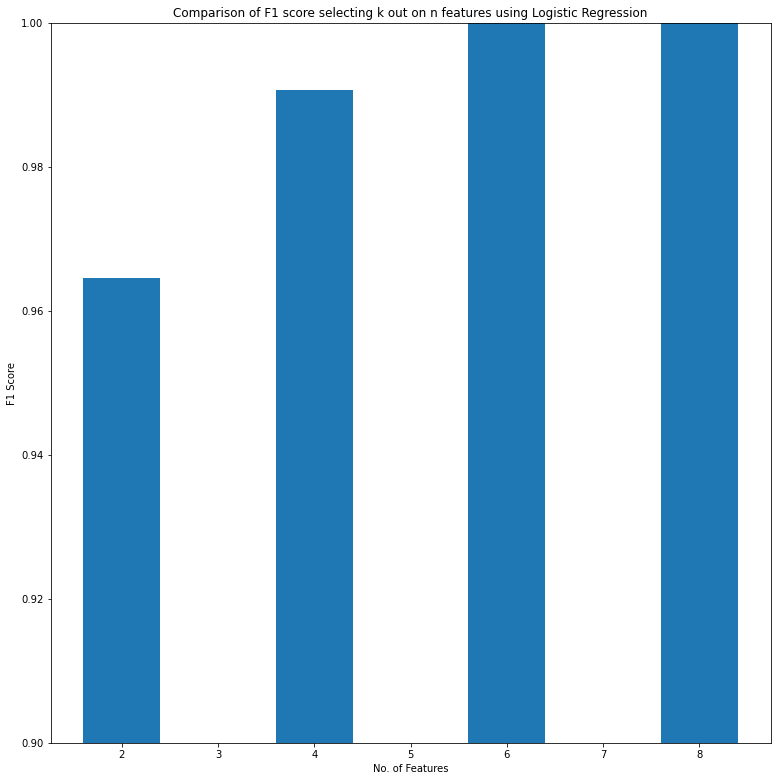

In [12]:
# The F1 score of the k best features selected taking into consideration all possible permutations and combinations.
# The bar graph is made for k=2,4,6,8
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
features = [2,4,6,8]
F1 = [0.9646,0.9907,1.0,1.0]
ax.bar(features,F1)
ax.set_xlabel('No. of Features')
ax.set_ylabel('F1 Score')
ax.set_title('Comparison of F1 score selecting k out on n features using Logistic Regression')
ax.set_ylim([0.9,1])
plt.show()